In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras import optimizers

In [0]:
import tensorflow as tf
gpu_options=tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [0]:
batch_size=4 #32,16,8,4,128
epochs=20
num_classes=10
data_augmentation=True
num_prediction=20
save_dir=os.path.join(os.getcwd(),'saved_models')
model_name='keras_cifar10_trained_model.h5'

In [45]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print('x_train shape:',x_train.shape)
print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
model=Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [47]:
print('Total Parameter: %d' %model.count_params())

Total Parameter: 1250858


In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)       

In [0]:
from keras import optimizers
opt_SGD=optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
opt_Adagrad=optimizers.Adagrad(lr=0.01,epsilon=None,decay=0.0)
opt_RMSprop=optimizers.RMSprop(lr=0.001,epsilon=None,decay=0.0)
opt_Adam=optimizers.Adam(lr=0.001,epsilon=None,decay=0.0)

opt=opt_SGD
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [51]:
if not data_augmentation:
  print('Not using data augmentation.')
  history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),shuffle=True)
else:
  print('Using real-time data augmentation.')
  print('')
  datagen=ImageDataGenerator(
      featurewise_center=False,
      samplewise_center=False,
      featurewise_std_normalization=False,
      samplewise_std_normalization=False,
      zca_whitening=False,
      zca_epsilon=1e-06,
      rotation_range=0,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0,
      zoom_range=0.,
      channel_shift_range=0.,
      fill_mode='nearest',
      cval=0.,
      horizontal_flip=True,
      vertical_flip=False,
      rescale=None,
      preprocessing_function=None,
      data_format=None,
      validation_split=0.0
  )
  datagen.fit(x_train)

  history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),shuffle=True)


Using real-time data augmentation.

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 71s 1ms/step - loss: 2.3088 - acc: 0.0987 - val_loss: 2.3048 - val_acc: 0.1000
Epoch 2/20
50000/50000 [==============================] - 71s 1ms/step - loss: 2.3083 - acc: 0.0993 - val_loss: 2.3107 - val_acc: 0.1000
Epoch 3/20
50000/50000 [==============================] - 72s 1ms/step - loss: 2.3080 - acc: 0.1011 - val_loss: 2.3080 - val_acc: 0.1000
Epoch 4/20
50000/50000 [==============================] - 73s 1ms/step - loss: 2.3078 - acc: 0.1002 - val_loss: 2.3082 - val_acc: 0.1000
Epoch 5/20
50000/50000 [==============================] - 72s 1ms/step - loss: 2.3080 - acc: 0.1001 - val_loss: 2.3083 - val_acc: 0.1000
Epoch 6/20
50000/50000 [==============================] - 73s 1ms/step - loss: 2.3078 - acc: 0.1013 - val_loss: 2.3086 - val_acc: 0.1049
Epoch 7/20
50000/50000 [==============================] - 73s 1ms/step - loss: 2.3080 - acc:

In [52]:
if not os.path.isdir(save_dir):
  os.makedirs(save_dir)
model_path=os.path.join(save_dir,model_name)
model.save(model_path)
print('Saved trained model at %s' %model_path)

scores=model.evaluate(x_test,y_test,verbose=1)
print('Test loss:',scores[0])
print('Test accuracy:',scores[1])

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5
10000/10000 [==============================] - 1s 90us/step
Test loss: 2.307603866958618
Test accuracy: 0.1


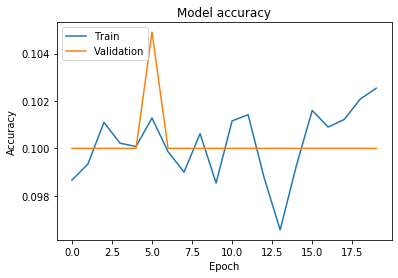

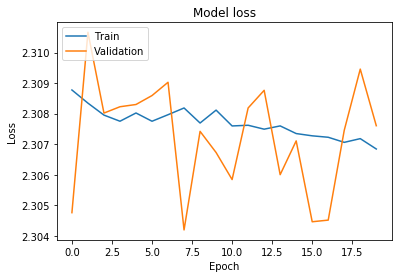

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy-SGD')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss-SGD')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()